In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


In [2]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.

def visualize_classifier(model, X, y, ax=None, cmap='bwr'):
    plt.figure(figsize=(10,10))
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3, alpha = 0.5)
    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
#     ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

In [3]:
# leemos nuestros datos
df = pd.read_csv("../datasets/DS_Bitácora_04_Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Eliminamos la columna id, que no nos interesa
df.drop("Id", axis=1, inplace=True)

In [5]:
predictoras = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = ['Species']

In [6]:
X = df[predictoras]
y = df[target]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)
# lo entrenamos
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.9733333333333334

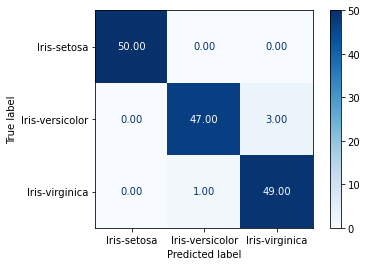

In [20]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f')

In [26]:
list(zip(tree.feature_importances_, X.columns.to_list()))

[(0.0, 'SepalLengthCm'),
 (0.0, 'SepalWidthCm'),
 (0.5856155514031495, 'PetalLengthCm'),
 (0.4143844485968506, 'PetalWidthCm')]

In [28]:
tree.classes_

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 None)

In [40]:
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=4, random_state = 42)
# lo entrenamos
tree.fit(X, y)
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.9933333333333333

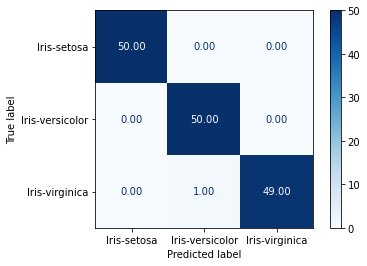

In [41]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.2f')

In [42]:
list(zip(tree.feature_importances_, X.columns.to_list()))

[(0.0, 'SepalLengthCm'),
 (0.01351351351351351, 'SepalWidthCm'),
 (0.5581648224311269, 'PetalLengthCm'),
 (0.42832166405535965, 'PetalWidthCm')]

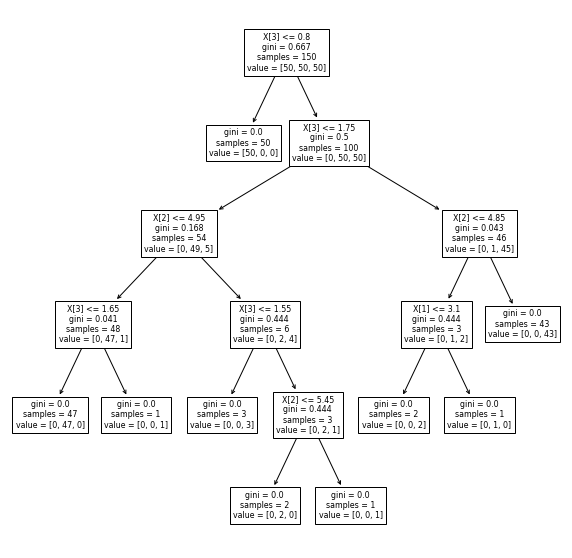

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
plt.figure(figsize=(10,10))
tree.plot_tree(clf)  # doctest: +SKIP
plt.show()